In [1]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
path =r'C:\Users\623737\Machine_Learning\IPL\Most_Runs_KKR' # use your path
allFiles = glob.glob(path + "/*.csv")
df_ms_runs = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=0)
    team = (file_.rsplit('.csv', 1)[0]).rsplit('_', 1)[1]
    year = (file_.rsplit('.csv', 1)[0]).rsplit('_', 2)[1]
    df['team'] = team
    df['year'] = year
    list_.append(df)
df_ms_runs = pd.concat(list_)


In [3]:
df_ms_runs.head(2)

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,team,year
0.0,SC Ganguly,13.0,13.0,1.0,349.0,91,29.08,307.0,113.68,0.0,3.0,0.0,33.0,15.0,KKR,2008
1.0,DJ Hussey,13.0,13.0,2.0,319.0,71,29,259.0,123.16,0.0,2.0,2.0,19.0,17.0,KKR,2008


In [4]:
df_ms_runs.isnull().sum()


Player    4
Mat       8
Inns      8
NO        8
Runs      8
HS        8
Ave       8
BF        8
SR        8
100       8
50        8
0         8
4s        8
6s        8
team      0
year      0
dtype: int64

In [5]:
df_ms_runs[df_ms_runs.Player.isnull()] 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,team,year
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KKR,2010
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KKR,2010
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KKR,2010
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KKR,2010


In [6]:
df_ms_runs.dropna(axis = 0,inplace = True)

In [7]:
cols =['Mat','Inns','NO','Runs','100','50','0','4s','6s','BF']
df_ms_runs[cols] = df_ms_runs[cols].astype(int)

In [8]:
df_ms_runs = df_ms_runs.reset_index(drop=True)

In [9]:
df_ms_runs[['Ave','Player','HS']][df_ms_runs['Ave']=='-']

,Ave,Player,HS
18,-,Iqbal Abdulla,1*
30,-,M Kartik,11*
37,-,Mashrafe Mortaza,2*
57,-,BAW Mendis,1*
59,-,Iqbal Abdulla,0*
72,-,Iqbal Abdulla,12*
76,-,L Balaji,3*
90,-,Iqbal Abdulla,1*
105,-,Iqbal Abdulla,6*
109,-,PJ Sangwan,4*


In [10]:
#replacing Ave = - with Higest Score of that player
df_ms_runs['Ave'][df_ms_runs['Ave']=='-'] = df_ms_runs['HS'][df_ms_runs['Ave']=='-'].str.rsplit('*', 1).str[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df_ms_runs[['Ave','Player']][df_ms_runs['Ave']=='-']

,Ave,Player


In [12]:
#Records with SR = - 
df_ms_runs[['Ave','Player','SR']][df_ms_runs['SR']=='-']

,Ave,Player,SR
159,0,GB Hogg,-


In [13]:
#replacing SR = - with zero
df_ms_runs['SR'][df_ms_runs['SR']=='-'] = 0
df_ms_runs[['Ave','Player','SR']][df_ms_runs['SR']=='-']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Ave,Player,SR


In [14]:
flot_cols = ['Ave','SR']
df_ms_runs[flot_cols] = df_ms_runs[flot_cols].apply(pd.to_numeric)
df_ms_runs.dtypes

Player     object
Mat         int32
Inns        int32
NO          int32
Runs        int32
HS         object
Ave       float64
BF          int32
SR        float64
100         int32
50          int32
0           int32
4s          int32
6s          int32
team       object
year       object
dtype: object

# Best Strike rate of a player in a season with atleast 5 Inns 

In [15]:
df_ms_runs[df_ms_runs['SR']==max(df_ms_runs[(df_ms_runs['Inns'] > 5)].SR)]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,team,year
130,AD Russell,13,11,2,326,66,36.22,169,192.89,0,3,0,35,19,KKR,2015


# Best Average of a player in a season with atleast 7 Inns 

In [16]:
df_ms_runs[(df_ms_runs['Ave']==max(df_ms_runs[(df_ms_runs['Inns'] > 7)].Ave))]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,team,year
146,YK Pathan,15,13,8,361,63*,72.2,248,145.56,0,3,0,33,13,KKR,2016


# Top 10 Run scorers for KKR in all Season

In [17]:
runs_by_player = df_ms_runs.groupby('Player', as_index=False).agg({"Runs": "sum"})
runs_by_player.sort_values(by = ['Runs'], ascending=[False]).head(10)

,Player,Runs
24,G Gambhir,3035
79,YK Pathan,1893
60,RV Uthappa,1806
30,JH Kallis,1295
38,MK Pandey,1270
64,SC Ganguly,1031
39,MK Tiwary,1002
10,BB McCullum,882
62,SA Yadav,608
41,MS Bisla,543


# Runs scored by Players in each seasons

In [18]:
runs_by_player_seasons = df_ms_runs.groupby(['Player','year'], as_index=False).agg({"Runs": "sum"})
runs_by_player_seasons['Runs']=runs_by_player_seasons['Runs'].astype(int)
runs_by_player_seasons.head(5)

,Player,year,Runs
0,A Chopra,2008,42
1,A Chopra,2009,11
2,AB Agarkar,2008,54
3,AB Agarkar,2009,66
4,AB Agarkar,2010,40


# Top 5 Run scorers for KKR in 2017 Season

In [19]:
runs_by_player_seasons.sort_values(by = ['year','Runs'], ascending=[False,False])[runs_by_player_seasons.year=='2017'].head(5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Player,year,Runs
55,G Gambhir,2017,498
92,MK Pandey,2017,396
132,RV Uthappa,2017,388
34,CA Lynn,2017,295
151,SP Narine,2017,224


# No of seasons played by players  - Top 10

In [20]:
runs_by_player_seasons.Player.value_counts().head(10)

YK Pathan           7
G Gambhir           7
LR Shukla           6
Shakib Al Hasan     6
SP Narine           6
BB McCullum         5
Iqbal Abdulla       5
RN ten Doeschate    5
RV Uthappa          4
MK Tiwary           4
Name: Player, dtype: int64

# Maximum run scored in a season 

In [21]:
runs_by_player_seasons[runs_by_player_seasons.Runs==max(runs_by_player_seasons['Runs'])]

,Player,year,Runs
129,RV Uthappa,2014,660


# Gautam Gambhir Performence by Year

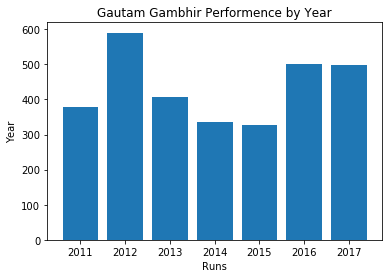

In [22]:
runs = runs_by_player_seasons[runs_by_player_seasons['Player'] == 'G Gambhir']['Runs']
year = runs_by_player_seasons[runs_by_player_seasons['Player'] == 'G Gambhir']['year']
y_pos = np.arange(len(year))
plt.bar(y_pos,runs)
plt.xticks(y_pos,year) 
plt.ylabel('Year')
plt.xlabel('Runs')
plt.title('Gautam Gambhir Performence by Year')
plt.show()

# KKR Battting performence Comparison by Seaons

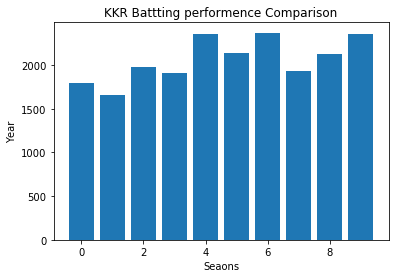

In [23]:
kkr_runs_by_seasons = df_ms_runs.groupby('year', as_index=False).agg({"Runs": "sum"})
seaons = kkr_runs_by_seasons['year']
runs = kkr_runs_by_seasons['Runs']
y_pos = np.arange(len(seaons))
plt.bar(y_pos,runs)
#plt.xticks(y_pos,year) 
plt.ylabel('Year')
plt.xlabel('Seaons')
plt.title('KKR Battting performence Comparison')
plt.show()

# Ganguly was dropped after having the best season

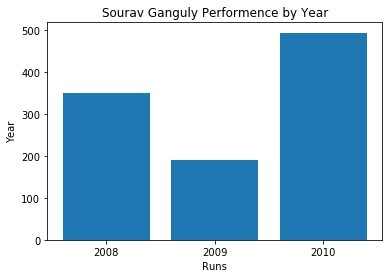

In [24]:
runs = runs_by_player_seasons[runs_by_player_seasons['Player'] == 'SC Ganguly']['Runs']
year = runs_by_player_seasons[runs_by_player_seasons['Player'] == 'SC Ganguly']['year']
y_pos = np.arange(len(year))
plt.bar(y_pos,runs)
plt.xticks(y_pos,year) 
plt.ylabel('Year')
plt.xlabel('Runs')
plt.title('Sourav Ganguly Performence by Year')
plt.show()

  # KKR - Batting Details Per Seaon

In [25]:
batting_by_seaons = df_ms_runs.groupby('year', as_index=False).agg({"Runs": "sum","BF": "sum","100":"sum","50":"sum","4s": "sum","6s": "sum"})
batting_by_seaons['Team_Strike_Rate'] = round(((batting_by_seaons['Runs']/batting_by_seaons['BF'])*100),2)
batting_by_seaons['Standing']=['League stage','League stage','League stage','Playoffs','Champions','League stage','Champions','League stage','Playoffs','Semi-finalists']
batting_by_seaons

,year,Runs,BF,100,50,4s,6s,Team_Strike_Rate,Standing
0,2008,1801,1501,1,7,162,75,119.99,League stage
1,2009,1664,1474,0,6,140,56,112.89,League stage
2,2010,1978,1641,0,12,199,63,120.54,League stage
3,2011,1905,1623,0,9,191,45,117.38,Playoffs
4,2012,2356,1956,0,11,210,69,120.45,Champions
5,2013,2134,1870,0,8,222,56,114.12,League stage
6,2014,2372,1820,0,13,223,76,130.33,Champions
7,2015,1939,1419,0,8,206,64,136.65,League stage
8,2016,2133,1634,0,15,194,65,130.54,Playoffs
9,2017,2354,1711,0,16,228,87,137.58,Semi-finalists


# Stats When KKR is Champions 

In [26]:
batting_by_seaons[batting_by_seaons['Standing']=='Champions']

,year,Runs,BF,100,50,4s,6s,Team_Strike_Rate,Standing
4,2012,2356,1956,0,11,210,69,120.45,Champions
6,2014,2372,1820,0,13,223,76,130.33,Champions
